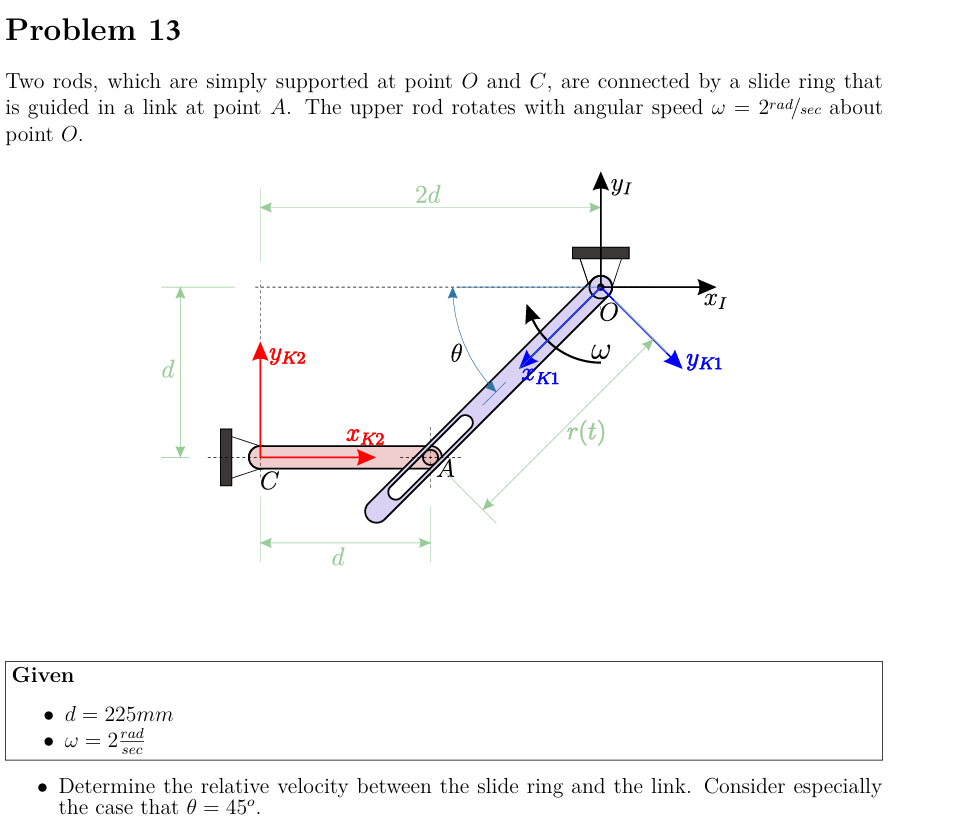

In [126]:
# Solve using analytical equations:
import sympy as sp

t = sp.symbols('t')
omega = sp.symbols('omega')
d = sp.symbols("d")
theta = 135 * sp.pi / 180 + omega * t
r = -d * (( 2 * sp.cos(theta) - sp.sin(theta)) 
          + sp.sqrt(sp.Pow( 2 * sp.cos(theta) - sp.sin(theta), 2) - 4)) 

print("r(t):")
sp.pprint(r)

r_sub = r.subs({d: 225, omega: 2, t:0})
print("\nFor theta = 135deg:")
sp.pprint(r_sub.evalf())

v = sp.diff(r, t)
print("\nv(t):")
sp.pprint(v)
v_sub = v.subs({d: 225, omega: 2, t:0})
print("\nFor theta = 135deg:")
sp.pprint(v_sub.evalf())

r(t):
   ⎛     ________________________________________                              ↪
   ⎜    ╱                                  2                                   ↪
   ⎜   ╱  ⎛       ⎛      π⎞      ⎛      π⎞⎞              ⎛      π⎞      ⎛      ↪
-d⋅⎜  ╱   ⎜- 2⋅sin⎜ω⋅t + ─⎟ - cos⎜ω⋅t + ─⎟⎟  - 4  - 2⋅sin⎜ω⋅t + ─⎟ - cos⎜ω⋅t + ↪
   ⎝╲╱    ⎝       ⎝      4⎠      ⎝      4⎠⎠              ⎝      4⎠      ⎝      ↪

↪    ⎞
↪    ⎟
↪  π⎞⎟
↪  ─⎟⎟
↪  4⎠⎠

For theta = 135deg:
318.198051533946

v(t):
   ⎛                                    ⎛       ⎛      π⎞          ⎛      π⎞⎞  ↪
   ⎜                                    ⎜2⋅ω⋅sin⎜ω⋅t + ─⎟ - 4⋅ω⋅cos⎜ω⋅t + ─⎟⎟⋅ ↪
   ⎜     ⎛      π⎞          ⎛      π⎞   ⎝       ⎝      4⎠          ⎝      4⎠⎠  ↪
-d⋅⎜ω⋅sin⎜ω⋅t + ─⎟ - 2⋅ω⋅cos⎜ω⋅t + ─⎟ + ────────────────────────────────────── ↪
   ⎜     ⎝      4⎠          ⎝      4⎠                      ___________________ ↪
   ⎜                                                      ╱                    ↪
   ⎜                  

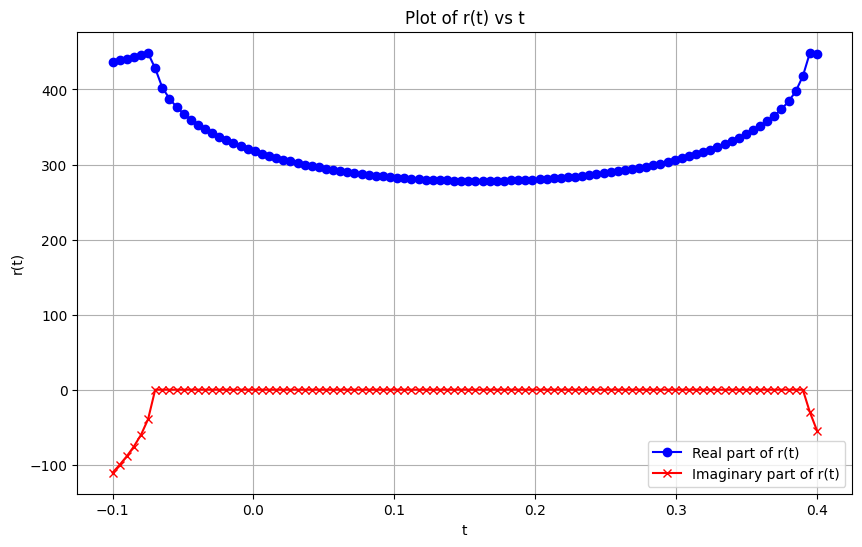

In [127]:
import numpy as np
import matplotlib.pyplot as plt
t_vals = np.linspace(-0.1, 0.4, 100)
r_vals = np.array([r.subs({d: 225, omega: 2, t: val}).evalf() for val in t_vals])
# print(r_vals)


# Separate real and imaginary parts
r_real = np.array([val.as_real_imag()[0] for val in r_vals])  # Real part
r_imag = np.array([val.as_real_imag()[1] for val in r_vals])  # Imaginary part

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot real part
plt.plot(t_vals, r_real, label='Real part of r(t)', color='blue', marker='o')

# Plot imaginary part
plt.plot(t_vals, r_imag, label='Imaginary part of r(t)', color='red', marker='x')

plt.title('Plot of r(t) vs t')
plt.xlabel('t')
plt.ylabel('r(t)')
plt.grid()
plt.legend()
plt.show()

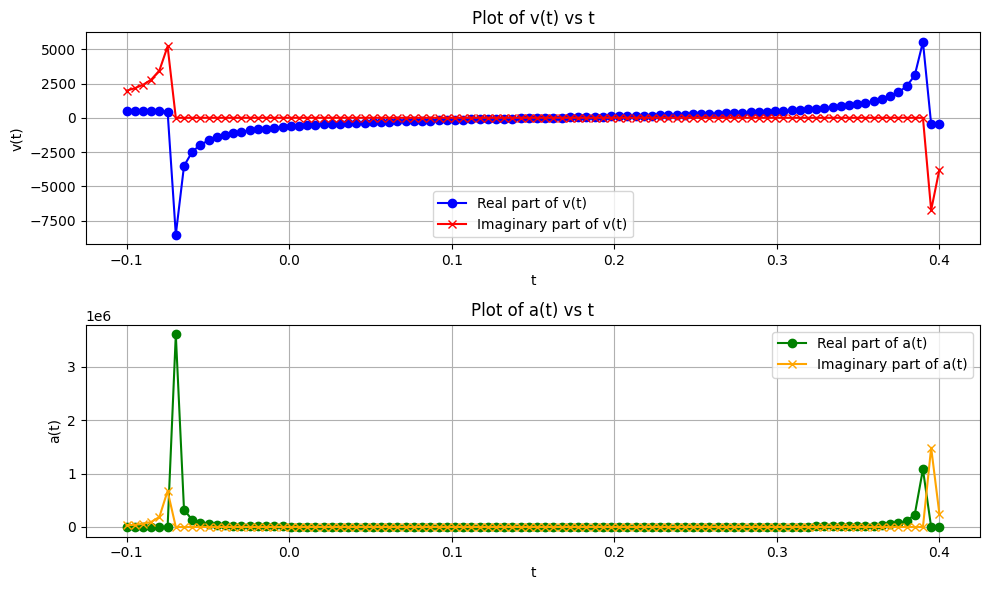

In [128]:
v_vals = np.array([v.subs({d: 225, omega: 2, t: val}).evalf() for val in t_vals])

a = sp.diff(v, t)
a_vals = np.array([a.subs({d: 225, omega: 2, t: val}).evalf() for val in t_vals])
 
# Separate real and imaginary parts for v
v_real = np.array([val.as_real_imag()[0] for val in v_vals])  # Real part
v_imag = np.array([val.as_real_imag()[1] for val in v_vals])  # Imaginary part

# Separate real and imaginary parts for a
a_real = np.array([val.as_real_imag()[0] for val in a_vals])  # Real part
a_imag = np.array([val.as_real_imag()[1] for val in a_vals])  # Imaginary part

# Plotting the results for v(t)
plt.figure(figsize=(10, 6))

# Plot real part of v
plt.subplot(2, 1, 1)
plt.plot(t_vals, v_real, label='Real part of v(t)', color='blue', marker='o')
plt.plot(t_vals, v_imag, label='Imaginary part of v(t)', color='red', marker='x')
plt.title('Plot of v(t) vs t')
plt.xlabel('t')
plt.ylabel('v(t)')
plt.grid()
plt.legend()

# Plotting the results for a(t)
plt.subplot(2, 1, 2)
plt.plot(t_vals, a_real, label='Real part of a(t)', color='green', marker='o')
plt.plot(t_vals, a_imag, label='Imaginary part of a(t)', color='orange', marker='x')
plt.title('Plot of a(t) vs t')
plt.xlabel('t')
plt.ylabel('a(t)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

